<a href="https://colab.research.google.com/github/Veronicacarr22/fake-news-classifier/blob/main/Fake_News_Classifier_Carr2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Classifier (TF-IDF + Naive Bayes / Logistic Regression)

This project builds a machine learning model to classify news articles as **real** or **fake**. Using natural language processing (NLP) techniques, text is cleaned, transformed into numerical features using TF-IDF, and used to train two classifiers: **Naive Bayes** and **Logistic Regression**.  
The project also explores the most common adjectives used in real vs. fake news.

---

## Data Preprocessing

- Imported two datasets: one containing fake news articles and one containing real news articles.  
- Combined them into a single dataframe with labels (`0 = Fake`, `1 = Real`).  
- Shuffled and re-indexed the dataset to ensure random distribution.  
- Applied text cleaning steps:  
  - Converted all text to lowercase.  
  - Removed numbers and punctuation.  
  - Removed stopwords (NLTK’s English stopword list + custom words like *“said”*, *“news”*, *“report”*, *“say”*).  
  - Lemmatized words to reduce them to their base form (e.g., *“running”* → *“run”*).  

This step ensures the text is standardized and reduces noise before feature extraction.

---

## Feature Engineering

- Used **TF-IDF (Term Frequency–Inverse Document Frequency)** to transform text into numeric features.  
- Configured TF-IDF with:  
  - Maximum 7,000 features.  
  - N-grams: unigrams and bigrams (1–2 word sequences).  
  - `min_df=3` → ignore rare words that appear in fewer than 3 documents.  
  - `max_df=0.8` → ignore overly common words that appear in more than 80% of documents.  
- Split the dataset into training and test sets (80/20 split, stratified by label).  

This created a sparse matrix of features representing the importance of words and word pairs in identifying fake vs. real news.

---

## Model Training

### Naive Bayes
- Trained a **Multinomial Naive Bayes** classifier on the TF-IDF features.  
- This algorithm is efficient and well-suited for text classification tasks.  

### Logistic Regression
- Trained a **Logistic Regression** model with a maximum of 1000 iterations to ensure convergence.  
- Logistic Regression serves as a strong baseline for binary classification.  

Both models were tested on the hold-out test set.

---

## Results

### Naive Bayes
- Accuracy: ~**96.6%**  
- Precision: ~**95.3%**  
- Recall: ~**97.8%**  
- F1-score: ~**97%**  
- Confusion matrix showed strong separation of classes, with a few more false positives compared to Logistic Regression.  

### Logistic Regression
- Accuracy: ~**99.2%**  
- Precision: ~**99%**  
- Recall: ~**99-100%**  
- F1-score: ~**99%**  
- Confusion matrix demonstrated excellent classification with near-perfect separation of real vs. fake articles.  

### Visuals
- **ROC Curves**: Both models performed well, with Logistic Regression achieving higher AUC (>0.99).  
- **Confusion Matrices**: Logistic Regression showed almost perfect classification, while Naive Bayes performed slightly lower but still very strong.  
- **Adjective Frequency Analysis**: Showed distinct differences in word choice between real and fake news articles, offering qualitative insights.  

---

## Conclusion

- Both models performed well, with Logistic Regression achieving slightly higher accuracy and recall compared to Naive Bayes.  
- TF-IDF feature engineering with unigrams and bigrams provided useful signals for detecting fake news.  
- Adjective frequency analysis added qualitative insights into stylistic differences between real and fake articles.  

### Possible Improvements
- Test additional models such as **Random Forests** or **Support Vector Machines (SVMs)**.  
- Use **word embeddings** (e.g., Word2Vec, GloVe, or transformer-based models like BERT) for richer text representations.  
- Perform hyperparameter tuning with GridSearchCV or cross-validation.  
- Explore topic modeling (LDA) or sentiment analysis to add more features.  

---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import pandas as pd

fake_df = pd.read_csv('/content/drive/MyDrive/MSDA683/Module4/Fake 1.csv')
real_df = pd.read_csv('/content/drive/MyDrive/MSDA683/Module4/True.csv')

fake_df['label'] = 0
real_df['label'] = 1


fake_df = fake_df.rename(columns={"Text": "text"})
real_df = real_df.rename(columns={"Text": "text"})

df = pd.concat([fake_df[['text', 'label']], real_df[['text', 'label']]], ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df.shape)
print(df['label'].value_counts())
df.head()

/tmp/ipython-input-2996815423.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_df = pd.read_csv('/content/drive/MyDrive/MSDA683/Module4/Fake 1.csv')


(44919, 2)
label
0    23502
1    21417
Name: count, dtype: int64


,text,label
0,"BROWNSVILLE, Texas (Reuters) - The rust-colore...",1
1,WASHINGTON (Reuters) - U.S. senators stressed ...,1
2,"Taya Kyle, the widow of infamous American Sni...",0
3,"After last week s election, Hillary supporters...",0
4,SYDNEY (Reuters) - Australia will not be allow...,1


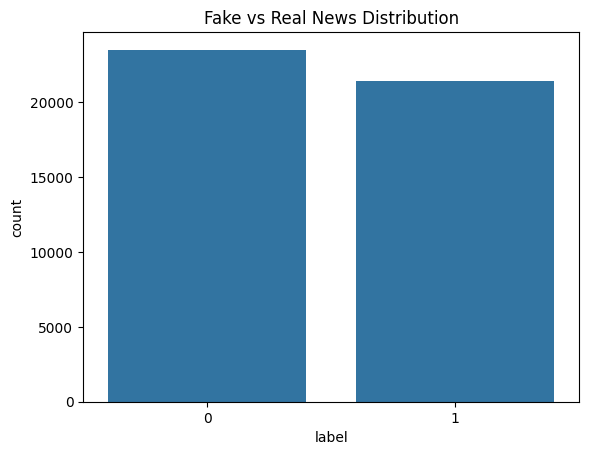

In [ ]:
sns.countplot(x='label', data=df)
plt.title('Fake vs Real News Distribution')
plt.show()

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tag import pos_tag
from nltk.data import load
import nltk

nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')

tokenizer = TreebankWordTokenizer()
tagger = nltk.tag.perceptron.PerceptronTagger() # Use the tagger by name


def extract_adjectives(text):
    words = tokenizer.tokenize(text)
    tagged = tagger.tag(words)
    return [word for word, tag in tagged if tag.startswith('JJ')]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

stop_words = set(stopwords.words('english'))
stop_words.update({'said', 'news', 'report', 'say'})

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(f'[{string.punctuation}]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=7000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.8
)
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
import nltk
from collections import Counter
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')


custom_adj_stopwords = {
    'last', 'first', 'new', 'old', 'same', 'u', 'many', 'several',
    'other', 'more', 'few', 'such', 'great', 'high', 'low', 'big'
}

def extract_adjectives(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words)
    adjectives = [word.lower() for word, tag in tagged if tag.startswith('JJ')]

    filtered_adjectives = [
        word for word in adjectives
        if len(word) > 2 and word not in custom_adj_stopwords
    ]

    return filtered_adjectives

real_text = ' '.join(df[df['label'] == 1]['clean_text'])
fake_text = ' '.join(df[df['label'] == 0]['clean_text'])

real_adj = extract_adjectives(real_text)
fake_adj = extract_adjectives(fake_text)

real_freq = Counter(real_adj).most_common(10)
fake_freq = Counter(fake_adj).most_common(10)

print("Top Real News Adjectives:\n", real_freq)
print("\nTop Fake News Adjectives:\n", fake_freq)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Top Real News Adjectives:
 [('republican', 20311), ('united', 13475), ('former', 10597), ('white', 9473), ('national', 8503), ('democratic', 8230), ('north', 8209), ('foreign', 8179), ('presidential', 7933), ('military', 7915)]

Top Fake News Adjectives:
 [('american', 15943), ('republican', 14911), ('white', 13112), ('hillary', 12742), ('trump', 10727), ('black', 8022), ('political', 7484), ('national', 7168), ('former', 7068), ('united', 6509)]


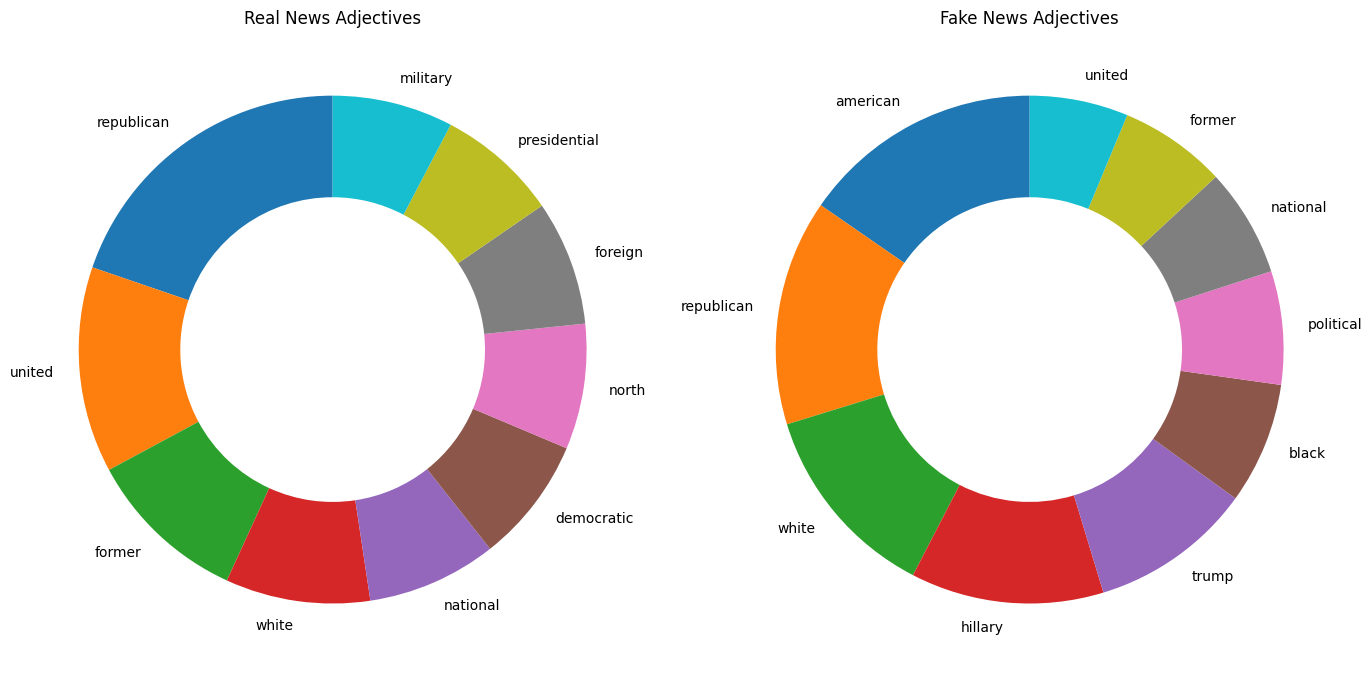

In [ ]:
import matplotlib.pyplot as plt

real_labels, real_sizes = zip(*real_freq)
fake_labels, fake_sizes = zip(*fake_freq)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].pie(real_sizes, labels=real_labels, startangle=90, wedgeprops=dict(width=0.4))
axs[0].set_title('Real News Adjectives')

axs[1].pie(fake_sizes, labels=fake_labels, startangle=90, wedgeprops=dict(width=0.4))
axs[1].set_title('Fake News Adjectives')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

In [ ]:
y_probs = nb.predict_proba(X_test)[:, 1]

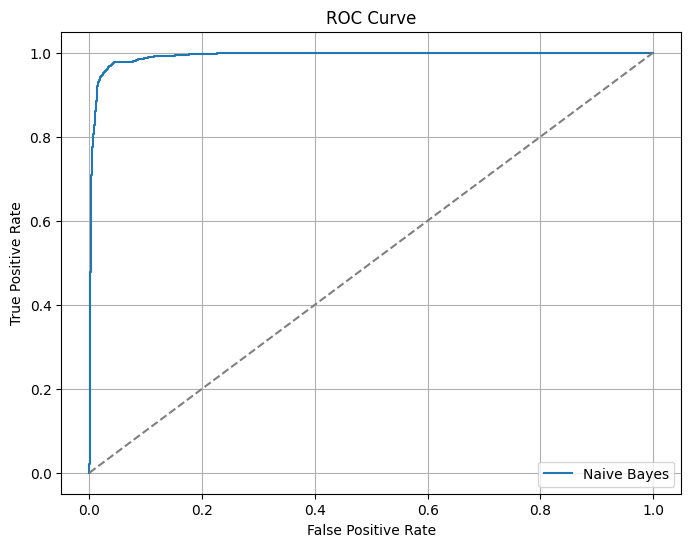

AUC Score: 0.9931253418592465


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Naive Bayes')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

auc = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc)

Accuracy: 0.966273374888691
Precision: 0.9528903049613109
Recall: 0.9775858043427504


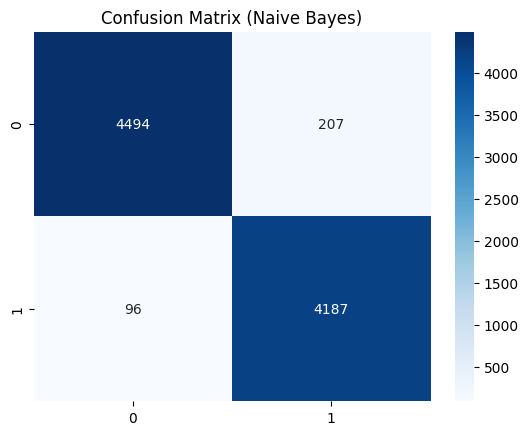

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4701
           1       0.95      0.98      0.97      4283

    accuracy                           0.97      8984
   macro avg       0.97      0.97      0.97      8984
weighted avg       0.97      0.97      0.97      8984



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print("Precision:", prec)
print("Recall:", rec)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9923196794300979
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4701
           1       0.99      1.00      0.99      4283

    accuracy                           0.99      8984
   macro avg       0.99      0.99      0.99      8984
weighted avg       0.99      0.99      0.99      8984



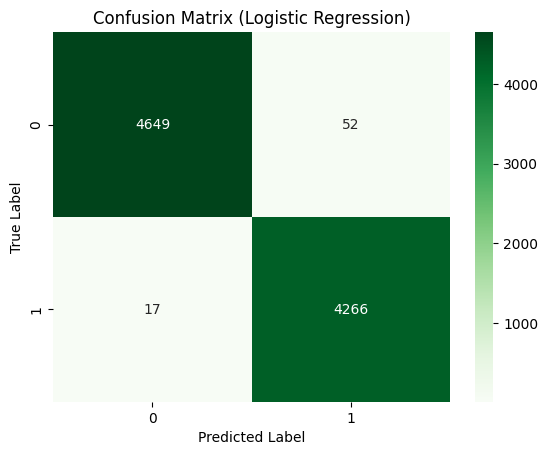

In [ ]:

from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
